# o agendamento do primeiro trabalho mais curto
### shortest job first(SJF)
 

No sjf o sistema operacionaç da prioridade para processos com tempo de trabalho mais curto.

O Shortest-Job-First Scheduling é considerado a melhor abordagem de escalonamento de processos, pois minimiza o tempo de espera dos outros processos que aguardam sua execução. Também é referido como Shortest-Job-Next devido à sua característica de agendar o trabalho com o tempo mínimo como próximo. É preemptivo e não preemptivo. Vejamos algumas de suas características:


## Simulador de algoritmo de agendamento de primeiro trabalho mais curto 
É possível simular algoritmos SJF preemptivos e não preemptivos .

### Incluindo um procedimento 

### Gráfico de Gantt Resultados para visualização



O algoritmo de agendamento Shortest Job First (SJF) seleciona o processo com o menor tempo de execução como a próxima execução.  Estratégias de escalonamento preemptivas e não preemptivas são possíveis.  O tempo médio que outros processos ficam esperando para serem executados é muito diminuiu.  

Shortest Job First é o acrônimo para esse conceito.

## As abordagens SJF geralmente se enquadram em uma das duas categorias:

### SJF sem preempção 
No escalonamento não preemptivo , o processo retém o ciclo da CPU uma vez atribuído a ele até que entre em um estado de espera ou seja eliminado .

### Um SJF proativo 
Os trabalhos são inseridos na fila de prontos à medida que são recebidos no agendamento SJF preemptivo .  O processo com o menor tempo de rajada começa a correr.  O processo atual é encerrado ou impedido de continuar se um com um tempo de rajada menor entrar nosistema, e o trabalho mais curto recebe um ciclo de CPU .

## Pilha 
de tecnologia usada Escolhi utilizar um notebook no jupyter criado com python para ilustrar o procedimento  de agendamento.



### Happy Coding!.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import plotly.express as px
import random

## consiste em criar uma tabela com as caracteristicas:

Ele se adapta melhor em sistemas do tipo Batch, onde o tempo de CPU, ou seja, Burst Time, é conhecido de antemão e a execução do processo não é tão crítica.
 
Está associado a cada processo como um tempo a ser concluído.
 
Ele pode aumentar a produção oferecendo um tempo de processo curto, ou seja, os processos curtos são executados primeiro.
 
Como os trabalhos que precisam de menos tempo são executados primeiro, isso também aumenta o tempo de processamento.
 
O algoritmo funciona melhor quando o tempo de chegada para todos os processos é o mesmo.
 
Antes de prosseguir, vamos aprender sobre alguns fatores-chave que desempenham um papel significativo no agendamento.

Arrival Time:  Hora em que um processo/trabalho chega
 
Burst Time:  Tempo necessário para completar a execução
 
Tempo de conclusão : o tempo real é necessário para concluir a execução do processo/trabalho
 
Turn around Time : A diferença entre o tempo de conclusão e o tempo de chegada
Turn Around Time=Tempo de Conclusão-Hora de Chegada
 

Tempo de espera:  a diferença entre o tempo de retorno e o tempo de rajada.
Tempo de Espera = Tempo de Retorno Tempo Explosivo
 

Existem dois tipos de algoritmos de escalonamento Shortest-Time-First, preemptivos e não preemptivos. Vamos vê-los em detalhes.

In [2]:
def create_table():
    num_processes = int(input("Enter the number of processes: "))
    proc = []
    
    for i in range(num_processes):
        process_id = i+1
        
        print(f"o ID do processo é : {process_id}")
        burst_time = int(input("Enter burst time: ")) 
        arrival_time = int(input("Enter arrival time: "))  
        
        process = {'process_id': process_id, 'burst_time': burst_time, 'arrival_time': arrival_time}
        proc.append(process)
    
    return proc

proc = create_table()
proc

Enter the number of processes: 5
o ID do processo é : 1
Enter burst time: 6
Enter arrival time: 4
o ID do processo é : 2
Enter burst time: 2
Enter arrival time: 6
o ID do processo é : 3
Enter burst time: 4
Enter arrival time: 80
o ID do processo é : 4
Enter burst time: 4
Enter arrival time: 2
o ID do processo é : 5
Enter burst time: 6
Enter arrival time: 4


[{'process_id': 1, 'burst_time': 6, 'arrival_time': 4},
 {'process_id': 2, 'burst_time': 2, 'arrival_time': 6},
 {'process_id': 3, 'burst_time': 4, 'arrival_time': 80},
 {'process_id': 4, 'burst_time': 4, 'arrival_time': 2},
 {'process_id': 5, 'burst_time': 6, 'arrival_time': 4}]

In [3]:
#inserir tabela aqui

ds=pd.DataFrame(proc)
ds

,process_id,burst_time,arrival_time
0,1,6,4
1,2,2,6
2,3,4,80
3,4,4,2
4,5,6,4


In [5]:
def find_waiting_time(proc, n, wt):
    wt[0] = 0
    for i in range(1, n):
        wt[i] = proc[i-1]['burst_time'] + wt[i-1]

def find_turnaround_time(proc, n, wt, tat):
    for i in range(n):
        tat[i] = proc[i]['burst_time'] + wt[i]     

def find_average_time(proc, n):
    wt = [0] * n
    tat = [0] * n
    total_wt = 0
    total_tat = 0

    find_waiting_time(proc, n, wt)
    find_turnaround_time(proc, n, wt, tat)

    data = {'Process': [], 'Burst time': [], 'Waiting time': [], 'Turnaround time': []}
    for i in range(n):
        data['Process'].append(proc[i]['process_id'])
        data['Burst time'].append(proc[i]['burst_time'])
        data['Waiting time'].append(wt[i])
        data['Turnaround time'].append(tat[i])

        total_wt += wt[i]
        total_tat += tat[i]

    df = pd.DataFrame(data)

    average_wt = float(total_wt) / float(n)
    average_tat = float(total_tat) / float(n)
    return df, average_wt, average_tat

n = len(proc)

proc.sort(key=lambda x: x['burst_time'])

print("Order in which process gets executed:")
for i in range(n):
    print(proc[i]['process_id'], end=" ")

df, average_wt, average_tat = find_average_time(proc, n)
print("\n")
print("\nAverage waiting time =", average_wt)
print("Average turnaround time =", average_tat)
df

Order in which process gets executed:
2 3 4 1 5 


Average waiting time = 6.8
Average turnaround time = 11.2


,Process,Burst time,Waiting time,Turnaround time
0,2,2,0,2
1,3,4,2,6
2,4,4,6,10
3,1,6,10,16
4,5,6,16,22


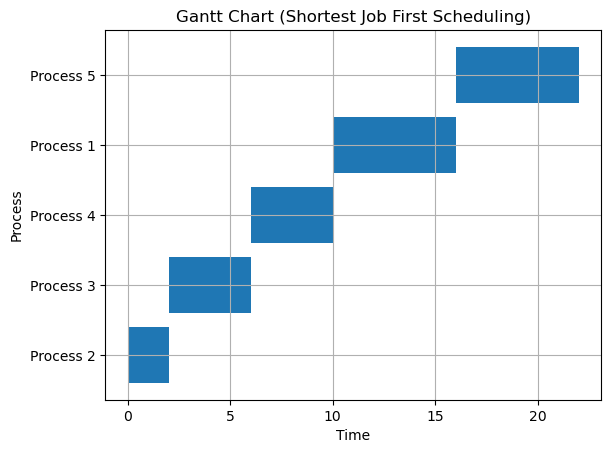

<Figure size 640x480 with 0 Axes>

In [6]:
def plot_gantt_chart(proc):
    n = len(proc)
    proc.sort(key=lambda x: x['burst_time'])

    fig, ax = plt.subplots()

    y_labels = []
    y_ticks = []
    start_time = 0
    for i in range(n):
        process = proc[i]
        y_labels.append(f'Process {process["process_id"]}')
        y_ticks.append(i)

        ax.broken_barh([(start_time, process['burst_time'])], (i-0.4, 0.8))
        start_time += process['burst_time']

    ax.set_xlabel('Time')
    ax.set_ylabel('Process')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_title('Gantt Chart (Shortest Job First Scheduling)')
    ax.grid(True)

    plt.show()

plot_gantt_chart(proc)
      
plt.savefig("gantt1.png") 

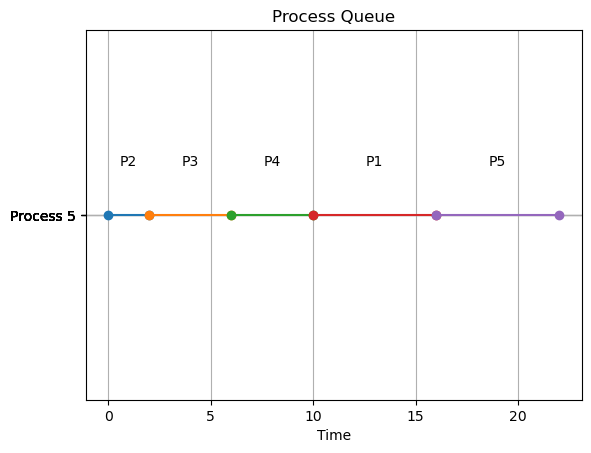

In [7]:
def plot_gantt_pilha(proc):
    n = len(proc)
    proc.sort(key=lambda x: x['burst_time'])

    fig, ax = plt.subplots()

    y_ticks = [0]
    y_labels = ['Process']
    x_start = 0
    for i in range(n):
        process = proc[i]

        ax.plot([x_start, x_start + process['burst_time']], [0, 0], marker='o')
        ax.text(x_start + process['burst_time'] / 2, 0.05, f'P{process["process_id"]}', ha='center', va='bottom')

        x_start += process['burst_time']
        y_ticks.append(0)
        y_labels.append(f'Process {process["process_id"]}')

    ax.set_xlabel('Time')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_title('Process Queue')
    ax.grid(True)
    ax.set_ylim(-0.2, 0.2)

    plt.show()

plot_gantt_pilha(proc)


In [ ]:
#####preemptivo######

def find_waiting_time(proc, n, wt):
    remaining_time = [proc[i]['burst_time'] for i in range(n)]
    complete = 0
    time = 0
    min_bt = float('inf')
    shortest = 0
    check = False

    while complete != n:
        for i in range(n):
            if proc[i]['arrival_time'] <= time and remaining_time[i] < min_bt and remaining_time[i] > 0:
                min_bt = remaining_time[i]
                shortest = i
                check = True

        if not check:
            time += 1
            continue

        remaining_time[shortest] -= 1
        min_bt = remaining_time[shortest]
        if min_bt == 0:
            min_bt = float('inf')
            complete += 1
            end_time = time + 1
            wt[shortest] = end_time - proc[shortest]['burst_time'] - proc[shortest]['arrival_time']
            if wt[shortest] < 0:
                wt[shortest] = 0

        time += 1

def find_turnaround_time(proc, n, wt, tat):
    for i in range(n):
        tat[i] = proc[i]['burst_time'] + wt[i]

def find_average_time(proc, n):
    wt = [0] * n
    tat = [0] * n
    total_wt = 0
    total_tat = 0

    find_waiting_time(proc, n, wt)
    find_turnaround_time(proc, n, wt, tat)

    data = {'Process': [], 'Arrival time': [], 'Burst time': [], 'Waiting time': [], 'Turnaround time': []}
    for i in range(n):
        data['Process'].append(proc[i]['process_id'])
        data['Arrival time'].append(proc[i]['arrival_time'])
        data['Burst time'].append(proc[i]['burst_time'])
        data['Waiting time'].append(wt[i])
        data['Turnaround time'].append(tat[i])

        total_wt += wt[i]
        total_tat += tat[i]

    df = pd.DataFrame(data)

    average_wt = float(total_wt) / float(n)
    average_tat = float(total_tat) / float(n)
    return df, average_wt, average_tat

n = len(proc)

proc.sort(key=lambda x: x['arrival_time'])

df, average_wt, average_tat = find_average_time(proc, n)
print("\n")
print("Average waiting time =", average_wt)
print("Average turnaround time =", average_tat)
df

In [ ]:
def sjf_preemptive(proc):
    num_processes = len(proc)
    burst_times = [process['burst_time'] for process in proc]
    arrival_times = [process['arrival_time'] for process in proc]
    remaining_times = burst_times.copy()
    waiting_times = [0] * num_processes
    total_time = 0
    gantt_chart = []

    while True:
        shortest_job = None
        for i in range(num_processes):
            if remaining_times[i] > 0 and arrival_times[i] <= total_time:
                if shortest_job is None or remaining_times[i] < remaining_times[shortest_job]:
                    shortest_job = i

        if shortest_job is None:
            break

        gantt_chart.append((shortest_job, total_time))
        remaining_times[shortest_job] -= 1
        total_time += 1

        for i in range(num_processes):
            if i != shortest_job and remaining_times[i] > 0 and arrival_times[i] <= total_time:
                waiting_times[i] += 1

    return gantt_chart, waiting_times

gantt_chart, waiting_times = sjf_preemptive(proc)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Gráfico Preemptivo SJF')

# Configuração dos eixos
ax.set_xlabel('Tempo')
ax.set_ylabel('Processo')

# Desenho do gráfico de Gantt
y_ticks = []
y_labels = []

for i, (process, start_time) in enumerate(gantt_chart):
    end_time = start_time + 1
    ax.broken_barh([(start_time, end_time - start_time)], (process - 0.4, 0.8), facecolors='tab:blue')
    y_ticks.append(process)
    y_labels.append(f'P{proc[process]["process_id"]}')

ax.set_ylim(0, len(proc))  # Corrigido para usar num_processes
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Time')
ax.set_ylabel('Process')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Gantt Chart (Shortest Job First Scheduling)')
ax.grid(True)

plt.show()


In [ ]:
print("Order in which processes get executed:")
for process, _ in gantt_chart:
    print(proc[process]['process_id'] ,end=" ")
    
completion_times = [0] * n
for i, (process, start_time) in enumerate(gantt_chart):
    completion_times[process] = start_time + 1

print("\n")    
print("Completion times:")
total_completion_time = sum(completion_times)
for i in range(n):
    print(f"Process {proc[i]['process_id']}: {completion_times[i]}")

average_completion_time = total_completion_time / n
print(f"\nAverage Completion Time: {average_completion_time}")

## Aspectos negativos do SJF 

O algoritmo SJF tem as seguintes desvantagens:

Existe a possibilidade de esse algoritmo morrer de fome se houver muitos processos de tempo de rajada mais curtos , o que fará com que processos mais longos esperem na fila e resultem em fome .  Esse algoritmo pode resultar em uma longa reviravolta.  Descobrir a duração dos próximos trabalhos não é uma tarefa fácil .  Clique aqui para obter mais informações sobre os diferentes algoritmos de agendamento do sistema operacional .


## Conclusão 

O processo com menor tempo de execução foi executado primeiro pelo algoritmo de escalonamento SJF .  O tempo que uma tarefa leva para concluir um procedimento é levado em consideração pelo algoritmo SJF . usado no processamento em lote porque é simples esperar para que um trabalho seja concluído antes de iniciar outro neste tipo de sistema .  Dois métodos de escalonamento SJF diferentes são os seguintes: - SJF sem retaliação  Um  SJF proativo SJF não preemptivo permite a execução de um único processo durante um único ciclo de CPU , e oprocesso permanece na CPU até que seja concluído .  O SJF é normalmente empregado quando o agendamento de longo prazo é necessário.  Comparando esta abordagem com o algoritmo FIFO (First in First out) , o tempo de espera é menor.